# High-Resolution Deep Convolutional Generative Adversarial Networks
J. D. Curtó, I. C. Zarza, Fernando de la Torre, Irwin King, Michael R. Lyu

## Data Preparation

In [ ]:
from crawler import crawler, purify_sources

# load urls of images into local file
crawler.run()
purify_sources.purify()


In [ ]:
from crawler import downloader

# download actual images into folder
downloader.run()

In [ ]:
from preprocessing import cropper

cropper.crop_to_face()

## Training

In [1]:
import tensorflow as tf
# MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1) / 255.
# x_train = x_train[:500,]
x_train.shape

(60000, 28, 28, 1)

In [3]:
from gan import GAN, DCGAN

gan = DCGAN(shape=(28,28,1))

gan.set_training_data(x_train)

In [4]:
gan.generator.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         524288    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 128)        

In [7]:
gan.train(epochs=40, iterations_generator=40, iterations_discriminator=10)

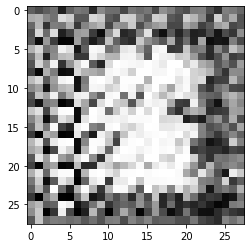

In [6]:
import matplotlib.pyplot as plt

img = gan.generate()
plt.imshow(img[0, :,:,0], cmap='gray')
plt.show()